
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---

## Trabajo práctico entregable - Parte 2

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
import scipy.stats

seaborn.set_context('talk')

## Lectura del dataset

En la notebook *00* se explican los detalles de la siguiente sección.

In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [3]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [4]:
# Constantes Auxiliares.
genero = 'profile_gender'
neto = 'salary_monthly_NETO'
dolares = 'salary_in_usd'
contrato = 'work_contract_type'

In [5]:
df[[genero, neto]].groupby(genero).describe()

salary_monthly_NETO                                     \
                             count          mean            std   min   
profile_gender                                                          
Hombre                      4944.0  98836.063558  102159.664237   1.0   
Mujer                        908.0  73501.414465   56256.880181   2.0   
Otros                         31.0  95441.354839   88635.674358  40.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          53285.0  80000.0  110000.0  2080000.0  
Mujer           43818.0  65000.0   92000.0   800000.0  
Otros           39500.0  74000.0  117500.0   380000.0

In [6]:
# Salario Mínimo para la subpoblación de estudio.
min_salary = 10000
# ¿Cuántos salarios erróneos existen en la columna de salarios?
print(f'Cantidad de salarios <= 10K: {(df[neto] <= min_salary).sum()}')
# Considerando el salario mínimo.
df = df[df[neto] > min_salary]

Cantidad de salarios <= 10K: 204


In [7]:
df[[genero, neto]].groupby(genero).describe()

salary_monthly_NETO                                         \
                             count           mean            std      min   
profile_gender                                                              
Hombre                      4794.0  101901.128538  102241.618974  10700.0   
Mujer                        857.0   77820.714807   54958.736885  12000.0   
Otros                         28.0  105660.714286   87235.710235  34000.0   

                                                          
                       25%      50%       75%        max  
profile_gender                                            
Hombre          55565.5625  80000.0  110000.0  2080000.0  
Mujer           48473.0000  67700.0   93770.0   800000.0  
Otros           43750.0000  78900.0  122750.0   380000.0

In [8]:
alpha = 0.05

In [9]:
is_man = df[genero] == 'Hombre'

groupA = df[is_man][neto]
groupB = df[~is_man][neto]

## Ejercicio 1: Estimación

**Consigna:**
Calcular una estimación puntual, y un intervalo de confianza de nivel $1 - \alpha$, para la resta entre la media del salario NETO para hombres menos la media del salario NETO para otros géneros (diferencia de las medias entre el *grupoA* y el *grupoB*).
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

In [10]:
print(f'Muestras del grupo A: {len(groupA)}')
print(f'Muestras del grupo B: {len(groupB)}')

Muestras del grupo A: 4794
Muestras del grupo B: 885


In [11]:
estimador = groupA.mean() - groupB.mean()
print(f'Estimador Puntual = {round(estimador, 1)}')

Estimador Puntual = 23199.6


**Un poco de teoría**

Las variables aleatorias *Salario NETO de hombres* ($X_{a}$) y *Salario NETO de otros* ($X_{b}$) poseen una distribución que desconocemos.

Tenemos una **muestra aleatoria** para cada una de estas variables.
Por el **TCL** sabemos que vale lo siguiente:

- Para el **promedio** de salarios de hombres.

    $\overline{X_{a}} \sim N(\mu_{a}, \frac{\sigma^{2}_{a}}{n_{a}})$

- Para el **promedio** de salarios de otros.

    $\overline{X_{b}} \sim N(\mu_{b}, \frac{\sigma^{2}_{b}}{n_{b}})$

Por lo tanto, asumiendo la *independencia* entre ambas variables, tenemos la distribución de nuestro **estimador**.

- $\overline{X_{a}} - \overline{X_{b}} \sim N(\mu_{a} - \mu_{b}, \frac{\sigma^{2}_{a}}{n_{a}} + \frac{\sigma^{2}_{b}}{n_{b}})$

In [12]:
# Calculamos los parámetros para las distribuciones de las VA.
n_a = len(groupA)
n_b = len(groupB)
mu_a = groupA.mean()
mu_b = groupB.mean()
sigma2_a = groupA.var()
sigma2_b = groupB.var()

In [13]:
mu = mu_a - mu_b
print(f'Esperanza del Estimador = {round(mu, 1)}')

sigma2 = (sigma2_a / n_a) + (sigma2_b / n_b)
print(f'Varianza del Estimador = {round(sigma2, 1)}')

sigma = numpy.sqrt(sigma2)
print(f'Desviación del Estimador = {round(sigma, 1)}')

print('----------')

intervalo = scipy.stats.norm.interval(1 - alpha, loc=mu, scale=sigma)
print(f'Intervalo de Confianza ({1 - alpha}) = {intervalo}')

i, s = intervalo
print(f'Longitud del IC = {s - i}')

Esperanza del Estimador = 23199.6
Varianza del Estimador = 5774855.9
Desviación del Estimador = 2403.1
----------
Intervalo de Confianza (0.95) = (18489.6244915835, 27909.575883362555)
Longitud del IC = 9419.951391779054


Un **intervalo de confianza** establece un intervalo que contiene al parámetro que queremos estimar ($\mu_{a} - \mu_{b}$) con una cierta probabilidad ($1 - \alpha$), en base a una **muestra aleatoria** de la población de estudio.

De alguna forma, el resultado obtenido nos da un primer indicio que quizás la *hipótesis nula* $H_{0}$ (ambos grupos cobran, en promedio, el mismo salario) no sea verdadera.
Si las variables aleatorias $X_{a}$ y $X_{b}$ tuvieran la misma esperanza, $\mu_{a} = \mu_{b}$, entonces el *intervalo de confianza* calculado debería (muy probablemente) incluir al $0$.

## Ejercicio 2: Test de hipótesis


### 2.1 Formalización

Describir formalmente los distintos componentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos *A* y *B*.

**Hipótesis Nula**

$H_0 = \dots$ 

**Estadístico (Pivote)**
  * Identificar el estadístico.
  * Escribir qué distribución tiene bajo $H_0$.

### 2.2 P-valor

1. Calcule el *p-valor* y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.
3. Los dos grupos de nuestra muestra tienen tamaños muy distintos. ¿Esto afecta al test de hipótesis?

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9, y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo interpretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativa de la tendencia general? ¿y para utilizarla en un juicio penal contra una empresa *XX* por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

**NOTA:** este análisis debería hacerse ANTES de recolectar los datos.

### Solución

A partir de la **muestra aleatoria** se construye un estadístico, $\overline{X_{a}} - \overline{X_{b}}$, para afirmar o rechazar $H_{0}$.
Se supone que la evidencia empírica nos dará las suficientes razones para rechazar, o no, $H_{0}$.

#### 2.1 Formalización

**Hipótesis Nula**

$H_0:$ La distribución de los salarios es **idéntica** entre ambos grupos, $\mu_{a} - \mu_{b} = 0$.

**Hipótesis Alternativa**

$H_1:$ La distribución de los salarios es **distinta** entre ambos grupos, $\mu_{a} - \mu_{b} \neq 0$.

**Nivel de Significancia**

$\alpha = 0.05$

**Estadistico**
Se deberia hacer el *Test de Welch* porque no se conocen las desviaciones ($\sigma_{a}$ y $\sigma_{b}$) de las poblaciones.

$t_{Welch} = \frac{ \overline{X_{a}} - \overline{X_{b}}} {s_{welch}} \sim t_{DoF}$

$s_{Welch} = \sqrt{ \frac{s^{2}_{a}} {n_{a}} +  \frac{s^{2}_{b}} {n_{b}}}$

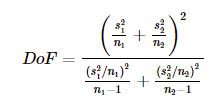

#### 2.2 P-valor

In [14]:
t_welch = scipy.stats.ttest_ind(groupA, groupB, equal_var=False)
print(f'P-valor = {t_welch.pvalue}')

P-valor = 1.295795770052478e-21


Se observa un **P-valor** significativamente menor al nivel de significancia ($\alpha = 0.05$), por lo que se **rechaza** la *hipotesis nula* ($H_{0}$).
Es decir se rechaza que las medias de los salarios de hombres, y otros géneros, sean idénticas.

#### 2.3 Potencia del Test
1.

In [15]:
from statsmodels.stats.power import tt_ind_solve_power

In [16]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
powers = [0.8, 0.9, 0.95]
ratio = len(groupB) / len(groupA)

In [17]:
for power in powers:
    resultado = tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)
    print(f'Potencia = {power} ---> Tamaño de Muestra = {round(resultado, 1)}')

Potencia = 0.8 ---> Tamaño de Muestra = 299.3
Potencia = 0.9 ---> Tamaño de Muestra = 400.1
Potencia = 0.95 ---> Tamaño de Muestra = 494.5


2. El poder estadístico de un test representa la probabilidad de rechazar correctamente la hipótesis nula cuando es realmente falsa. El tamaño de nuestras muestras es bastante superior a los tamaños que aseguran los poderes de 0.8, 0.9 y 0.95

Segun la teoria pareciera una muestra suficientemente representativa, pero segun nuestro conocimiento de dominio pareciera no ser así.
En caso de llevarlo a un juicio,siendo la $H_{0}$ que la empresa no discriminó, se tendría una confianza de $95\%$ de rechazar la afirmación que la empresa no discriminó, siendo que discrimó. 

## Ejercicio 3: Comunicación y visualización

**Consigna:**
Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo **PDF**.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se adapte a **UNA** de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro. No más de 1 página A4 (o dos si los gráficos son muy grandes).
    1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
    2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
    3. Puntos clave: 
        1. Simpleza de los gráficos.
        2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
        3. Selección de UNA oración sobre la que se hace énfasis.
        4. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
    1. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
    2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
    3. Puntos clave:
        1. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
        2. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
        3. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.).
        4. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
    1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20).
    2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
    3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
    4. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
    5. Puntos clave:
        1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
        2. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.

**Ejercicio 3**

Mostrar un gráfico de barras horizontales, con eje *x* el salario mensual NETO promedio, con eje *y* el tipo de contrato, y separado por colores según se cobra en dólares o en pesos.

In [18]:
df['salary_in_usd'] = df['salary_in_usd'].fillna('Mi sueldo está pesificado')

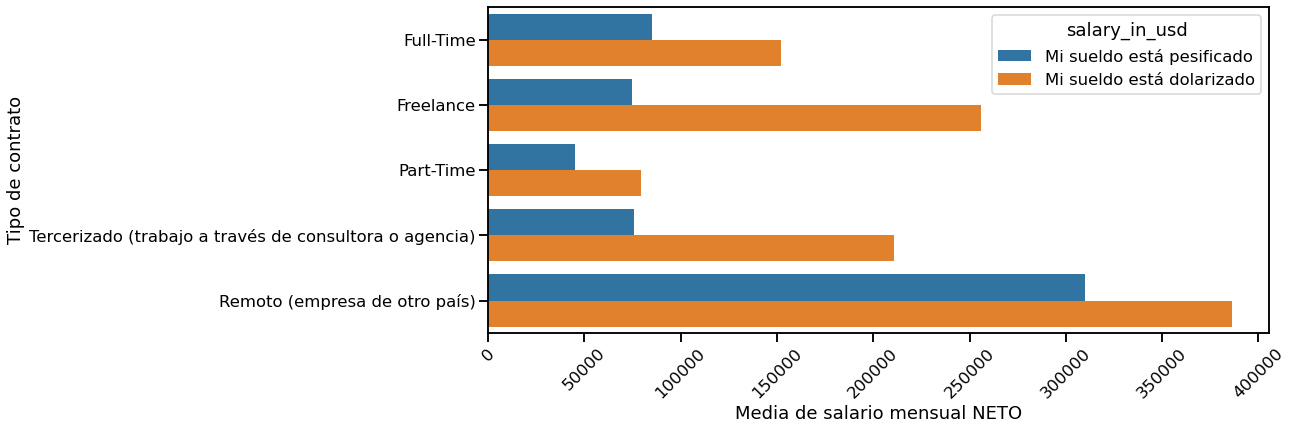

In [19]:
fig = plt.figure(figsize=(14, 6))

seaborn.barplot(x=df[neto],
                y=df[contrato], 
                hue=df[dolares],
                estimator=numpy.mean,
                ci=None,
                orient='h')

plt.xlabel('Media de salario mensual NETO')
plt.ylabel('Tipo de contrato')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='x')

In [20]:
new_groups = {
    'Full-Time': 'Empresa Argentina',
    'Part-Time': 'Empresa Argentina',
    'Freelance': 'Empresa Argentina',
    'Tercerizado (trabajo a través de consultora o agencia)': 'Empresa Argentina',
    'Remoto (empresa de otro país)': 'Empresa Extranjera',
}

sorted_work_contract = ['Empresa Argentina', 'Empresa Extranjera']

grupo = 'work_contract_group'

df[grupo]= df[contrato].replace(new_groups)

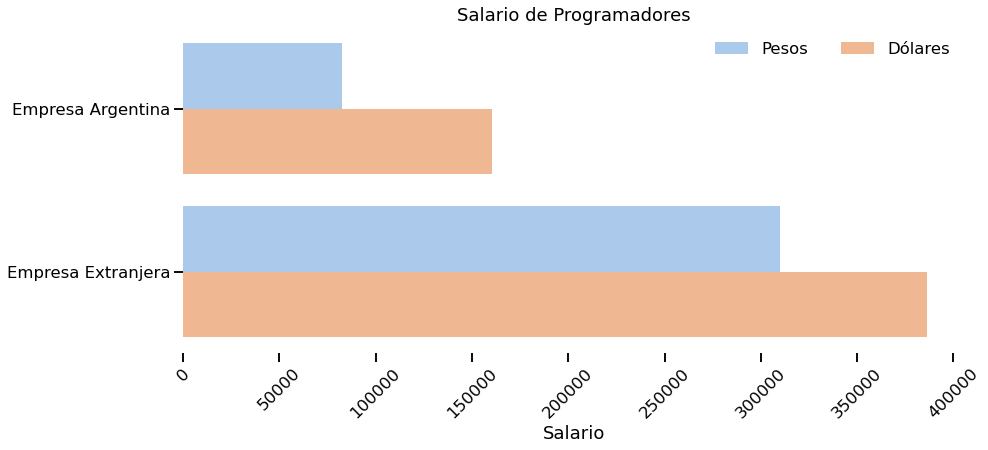

In [21]:
fig = plt.figure(figsize=(14, 6))

seaborn.barplot(x=df[neto],
                y=df[grupo], 
                hue=df[dolares],
                estimator=numpy.mean,
                ci=None,
                orient='h',
                palette='pastel')

seaborn.despine(left=True, bottom=True)

plt.title('Salario de Programadores')

plt.xlabel('Salario')
plt.ylabel('')

plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='x')

my_labels = ['Pesos', 'Dólares']
plt.legend(labels=my_labels, frameon=False, loc='upper right', ncol=2);

Las empresas extranjeras pagan mucho más que las empresas argentinas, para el mismo tipo de contrato de trabajo (de programación).
Se muestra la despreciación del peso frente a las monedas extranjeras, más precisamente, el dólar.